# The Sparks Foundation: GRIP

## Task 2: Prediction using Unsupervised Machine Learning 

### Introduction

This project is task #2 of TSF GRIP data science and business analytics program. I will have to use Unsuprvised Machine Learning method to cluster the types of Iris flowers from its measurements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Wrangling

The next 2 cells cause unidentified error when uploaded to github, therefore I decided to turn them into comments since they don't work either way. 


In [38]:
# df=pd.read_csv('https://bit.ly/3kXTdox')

In [39]:
# df.head()

As this is my first time hearing about and using Iris dataset, I learnt that there is a way to load it as a dataframe through the sklearn: datasets.load_iris()

In [4]:
from sklearn import datasets

In [5]:
iris= datasets.load_iris()
df=pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


here i succussfuly loaded & transformed the dataset into dataframe.

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the above function we can tell that there is no obvious outliers since the max and min fall in the range of the std.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

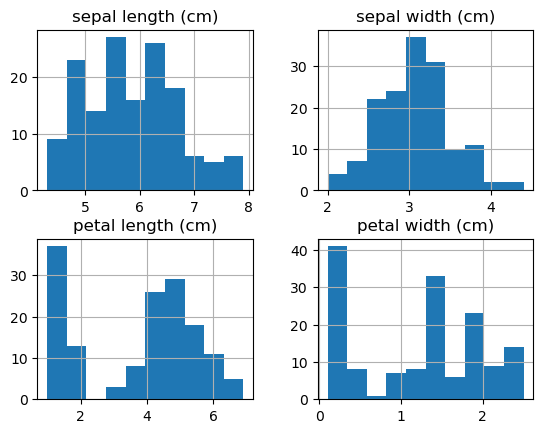

In [8]:
df.hist()

### Preporcessing the data

In [15]:
import sklearn.cluster as clust

Now using the StandasrdScaler to scale down the observations in df and create a new dataframe called scdf

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scdf = scaler.fit_transform(df)

In [13]:
scdf[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

### Creating the K-Means Clustering model

In [17]:
kmeans = clust.KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=None)

In [19]:
x_kmeans=kmeans.fit_predict(scdf)
x_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [21]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [22]:
# displaying the number of iterations
kmeans.n_iter_

6

In [28]:
kmeans.labels_[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

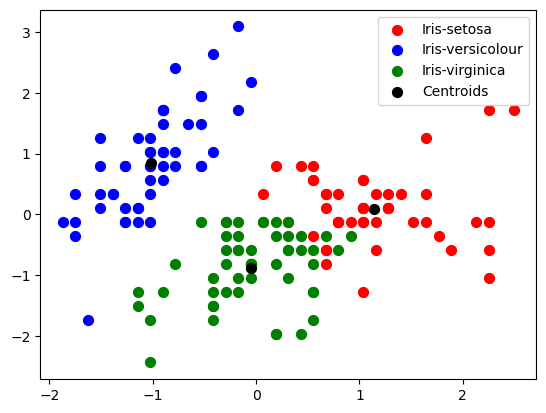

In [37]:
plt.scatter(scdf[x_kmeans == 0, 0], scdf[x_kmeans == 0, 1],s = 50, c = 'red', label = 'Iris-setosa')

plt.scatter(scdf[x_kmeans == 1, 0], scdf[x_kmeans == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolour')

plt.scatter(scdf[x_kmeans == 2, 0], scdf[x_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
#Visualising the clusters On the sepal length (cm) & sepal width (cm) columns

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 50, c = 'black', label = 'Centroids') 


plt.legend()

plt.show()